# Polyhedra

In [1]:
%matplotlib widget
from matplotlib.pyplot import close,subplot, subplots
from ipyshow.polyhedra import draw, min_edge_colouring, min_path_cover, min_thread_colouring, Polyhedron, Multipath
P4,P6,P8,P12,P20 = (getattr(Polyhedron,f'P{n}') for n in (4,6,8,12,20))

## The Platonic polyhedra
---

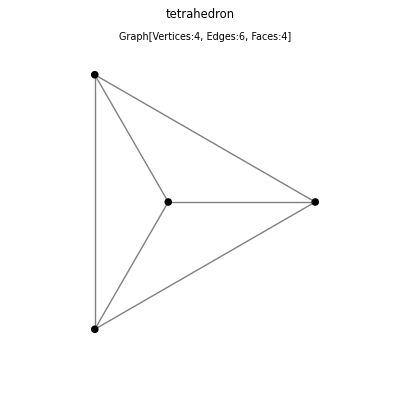

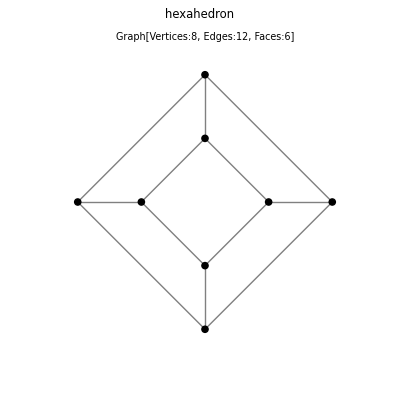

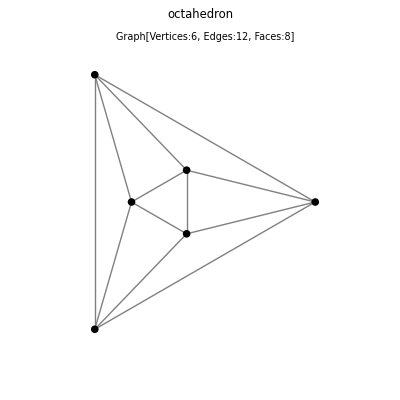

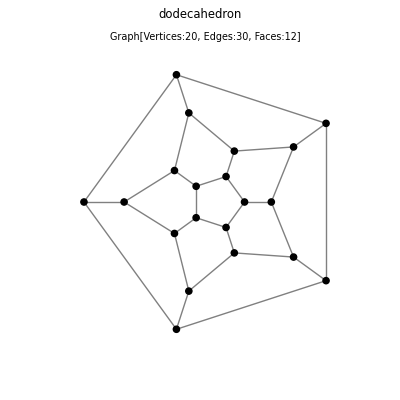

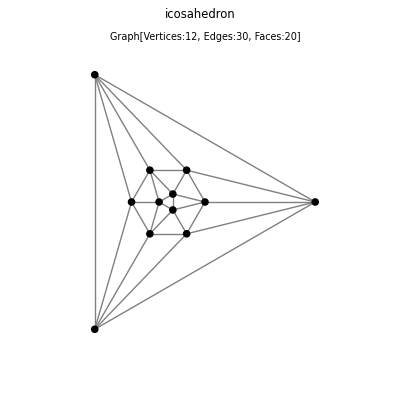

In [2]:
close('all')
for p in (P4,P6,P8,P12,P20): draw(p(),width=1)

## Tetrahedron
---

### Minimum edge colouring

The minimum number of colours is $3$.

Symmetry breaking ($1$ solution): for a given vertice, the colours of the edges adjacent to it are $012$.

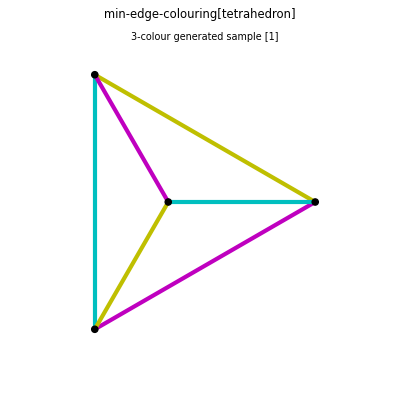

In [6]:
close('all')
draw(min_edge_colouring(P4(),*(('O',('a',k),k) for k in range(3))),E_COLOURS=enumerate('cmy'))

### Minimum path cover

The minimum number of paths is $2$.

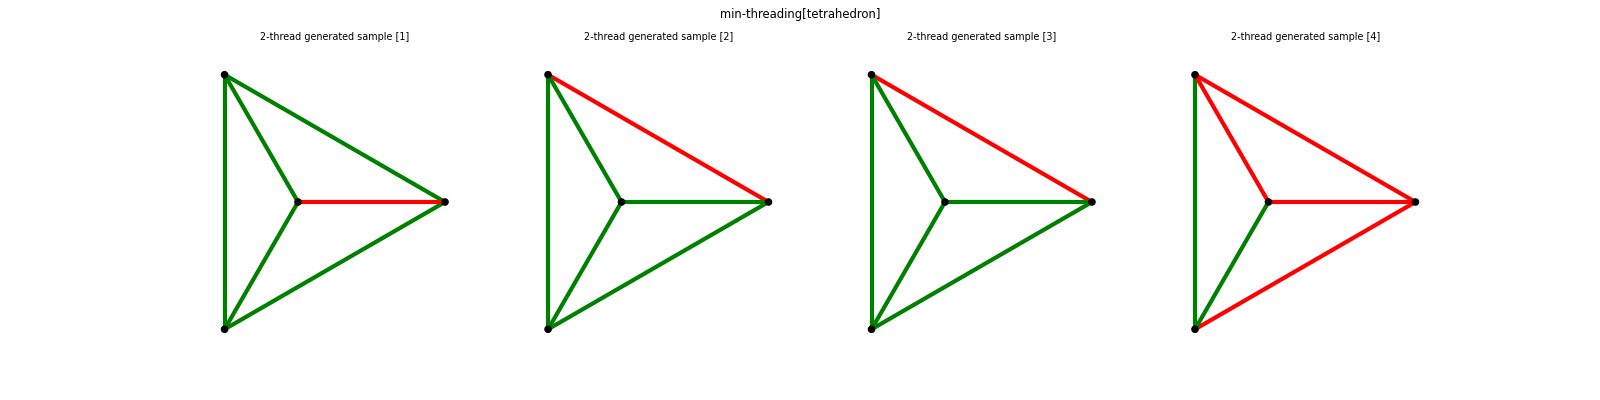

In [7]:
close('all')
draw(min_thread_colouring(P4()))

## Hexahedron (Cube)
---

### Minimum edge colouring

The minimum number of colours is $3$.

Symmetry breaking ($3$ solutions): for a given face, the colours of 3 of its consecutive edges are $010$.

Indeed, let $e_{1:4}$ be 4 consecutive edges of a square face, enumerated in a given orientation of the surface starting at an arbitrary edge. Let A,B be the colours of $e_1,e_2$, and let C be the 3-rd colour. The sequence of colours of the edges $e_{1:4}$ can only be one of the following:

|                   |ABAX.|A.BCB|
|-------------------| --- | --- |
|=(modulo cyclicity)|ABAX |BCBA |

Hence, they all conform to the pattern ABAX modulo permutation of the colours ABC.

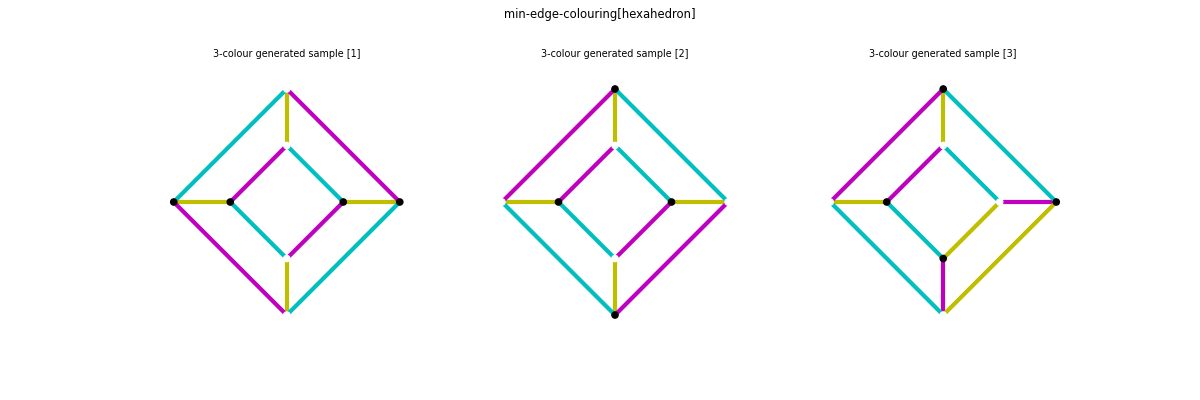

In [8]:
close('all')
draw(min_edge_colouring(P6(),*((('a',k),('a',k+1),k%2) for k in range(3))),E_COLOURS=enumerate('cmy'))

### Minimum path cover

The minimum number of paths is $4$.

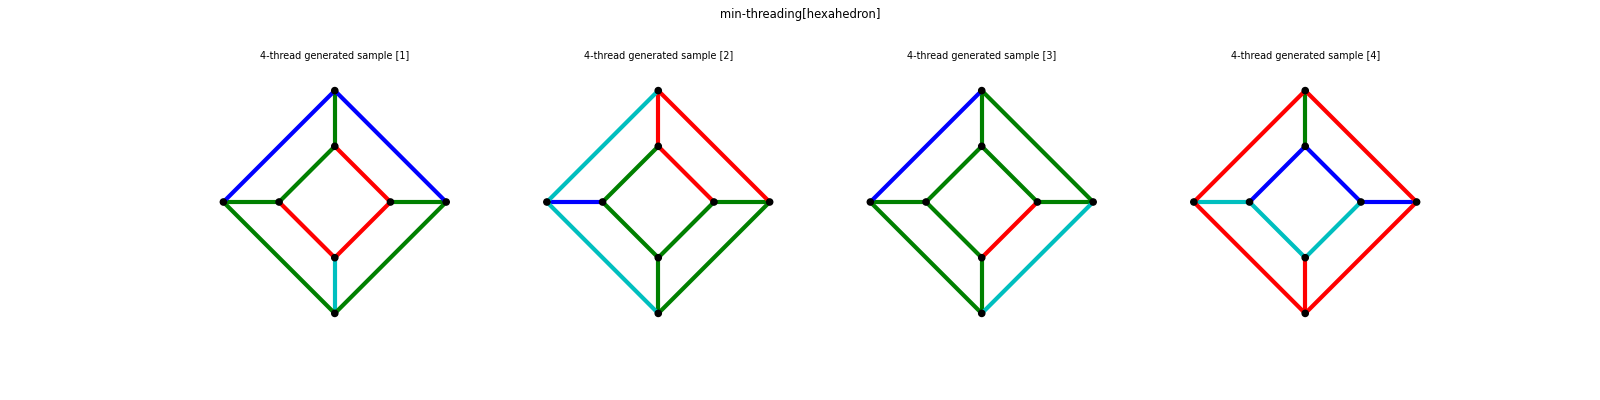

In [9]:
close('all')
draw(min_thread_colouring(P6()))

## Octahedron
---

### Minimum edge colouring

The minimum number of colours is $4$.

Symmetry breaking (2 solutions): for a given face, the colours of its consecutive edges are $012$.

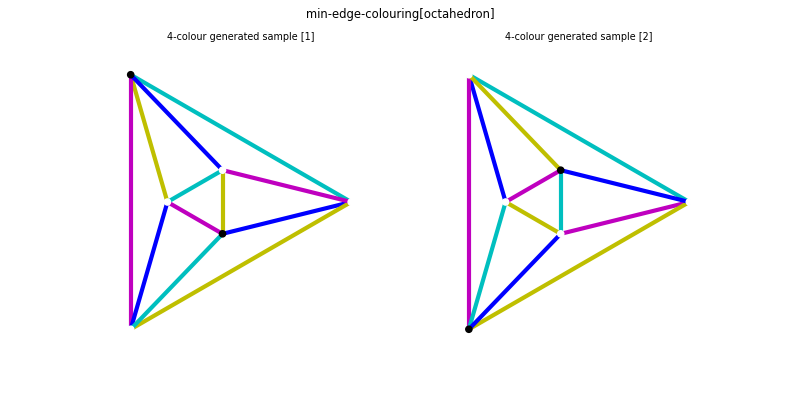

In [10]:
close('all')
draw(min_edge_colouring(P8(),*((('a',k),('a',(k+1)%3),k) for k in range(3))),E_COLOURS=enumerate('cmyb'))

### Minimum path cover

The minimum number of paths is $0$ (i.e. the graph is a single loop).

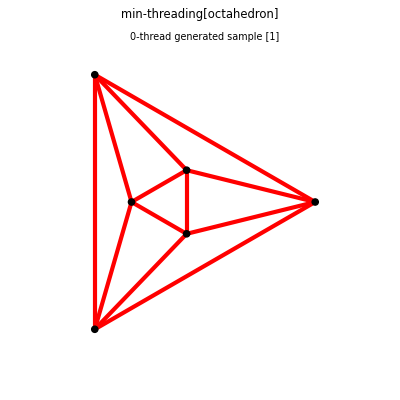

In [11]:
close('all')
draw(min_thread_colouring(P8()))

## Dodecahedron
---

### Minimum edge colouring

The minimum number of colours is $3$.

Symmetry breaking (2 solutions): for a given face, the colours of its consecutive edges are $01012$.

Indeed, let $e_{1:5}$ be the edges of a pentagonal face, enumerated in a given orientation of the surface starting at an arbitrary edge. Let A,B be the colours of $e_1,e_2$, and let C be the 3-rd colour. The sequence of colours of the edges $e_{1:5}$ can only be one of the following:

|                   |ABABC.|ABAC.B|ABC.AB|AB.CAC|A.BCBC|
|-------------------| ---  | ---  | ---  | ---  | ---  |
|=(modulo cyclicity)|ABABC |BABAC |ABABC |CACAB |BCBCA |

Hence, they all conform to the pattern ABABC modulo permutation of the colours ABC.

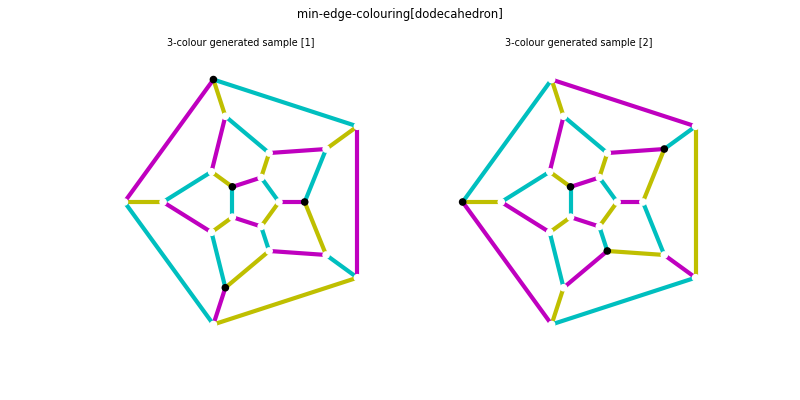

In [13]:
close('all')
draw(min_edge_colouring(P12(),*((('a',k),('a',k+1),k%2) for k in range(4))),E_COLOURS=enumerate('cmy'))

### Minimum path cover

The minimum number of paths is $10$.

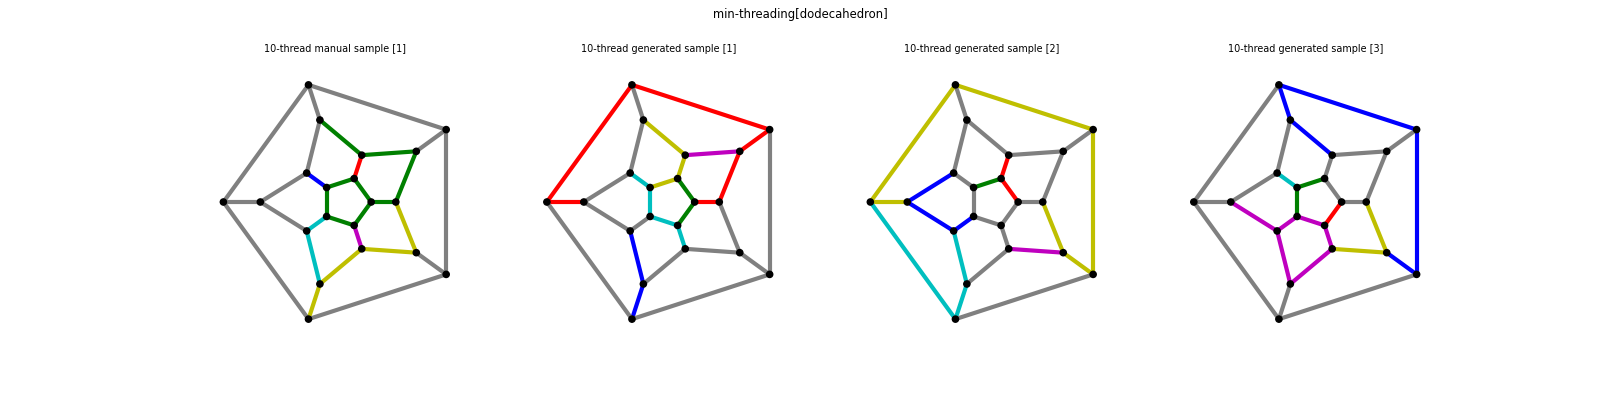

In [14]:
close('all')
def manual_sol():
  def edges(*l): return zip(l[:-1],l[1:])
  mp = Multipath((
    *edges(*(('a',k) for k in range(5)),('a',0),*((('b_' if k%2 else 'b'),(3*k)%5) for k in range(10)),('b',0)),
    *edges(*(('a_',k) for k in range(5)),('a_',0),('b_',0)),
    *((('a',k),('b',k)) for k in range(1,5)),
    *((('a_',k),('b_',k)) for k in range(1,5)),
  ))
  assert len(mp.paths) == 10
  yield mp
draw(min_thread_colouring(P12(),manual_sol()))

## Icosahedron
---

### Minimum edge colouring of the icosahedron

The minimum number of colours is $5$. No obvious symmetry breaking.

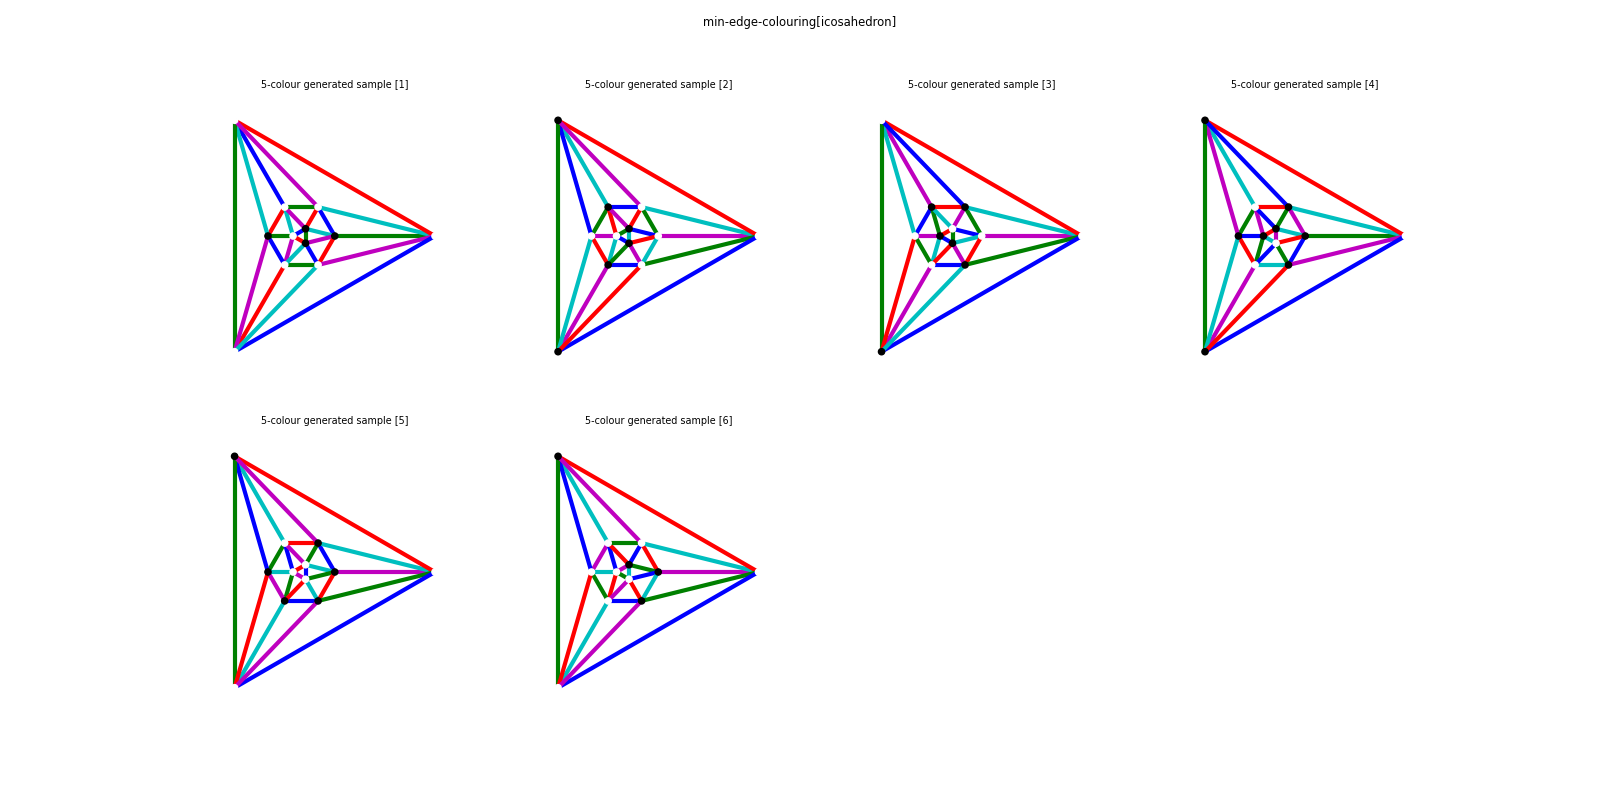

In [15]:
close('all')
draw(min_edge_colouring(P20(),(('b',0),('a_',2),3),*((('b',k),('b',(k+1)%3),k) for k in range(3)),nsol=6))

### Minimum path cover of the icosahedron

The minimum number of paths is $6$.

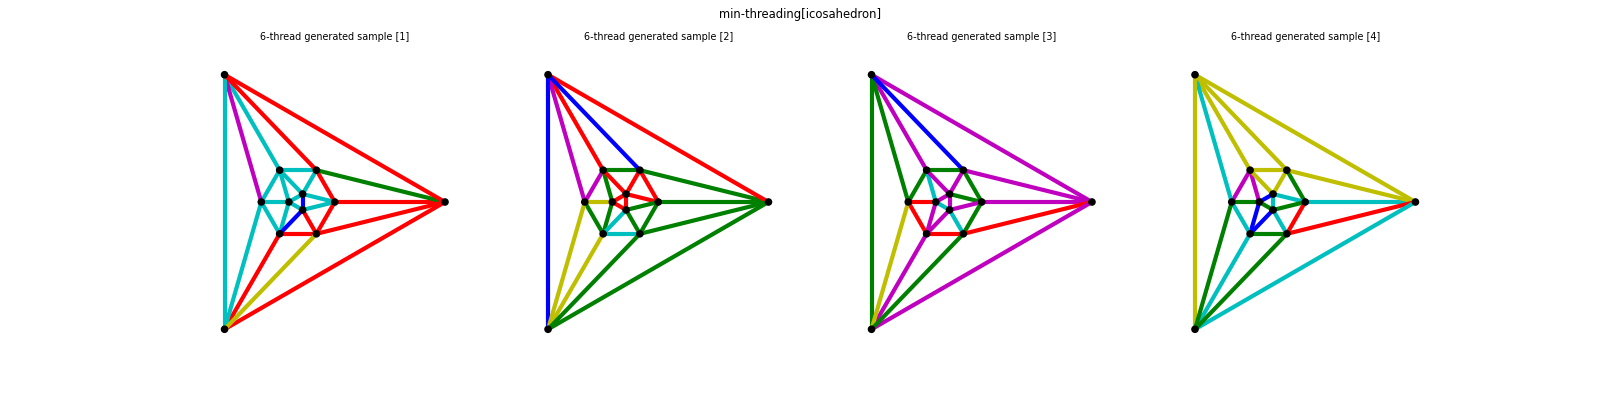

In [16]:
close('all')
draw(min_thread_colouring(P20()))